### Notes

- 5 people from the lab tested the staircase

- trying to understand if the estimated k using the staircase explains participants' accept/reject choices 

- trying to understand if staricas is even necessary for the main task 

### Import libraries

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import numpy as np

%matplotlib inline

### Load data

In [22]:
# Path to the directory containing your CSV files
directory_path = '/Users/majafriedemann/Documents/GitHub/pgACC-TUS/experiment_code/staircase_data'

# Use glob to find all CSV files in the directory
csv_files = glob.glob(directory_path + '/*.csv')

# List to hold DataFrames
dfs = []

# Iterate through the list of files
for file in csv_files:
    # Read each CSV file into a DataFrame
    df = pd.read_csv(file)
    
    # Append the DataFrame to the list
    dfs.append(df)

# Concatenate all DataFrames in the list into a single DataFrame
combined_df = pd.concat(dfs, ignore_index=True)

# Delete Lilian
combined_df = combined_df[combined_df['participant'] != 1]

combined_df

,expName,curec_ID,session_nr,date,end_date,participant,age,gender,gripper_baseline,max_effort_calibration_1,...,total_reward,effort_offer,next_effort_offer,effort_expended,effort_trace,estimated_k,estimated_net_value,participant_response,participant_choice_response_time,participant_effort_response_time
0,pgACC-TUS-staircase,NaN,1,2024-02-13_11h43.05.255,NaN,2,NaN,NaN,-0.066528,2.446027,...,0,6,NaN,NaN,"[0.32623291015625, 0.40252685546875, 0.5105590...",0.500000,0.000000,NaN,NaN,NaN
1,pgACC-TUS-staircase,NaN,1,2024-02-13_11h43.05.255,NaN,2,NaN,NaN,-0.066528,2.446027,...,18,6,7.0,7.022331,"[0.0091552734375, 0.0079345703125, 0.007934570...",0.500000,0.000000,accepted,4.344511,2.241329
2,pgACC-TUS-staircase,NaN,1,2024-02-13_11h43.05.255,NaN,2,NaN,NaN,-0.066528,2.446027,...,41,7,7.0,8.425190,"[0.025634765625, 0.02532958984375, 0.026245117...",0.406800,-1.500000,accepted,3.187663,1.851403
3,pgACC-TUS-staircase,NaN,1,2024-02-13_11h43.05.255,NaN,2,NaN,NaN,-0.066528,2.446027,...,62,7,8.0,7.905315,"[0.00335693359375, 0.00335693359375, 0.0048828...",0.406800,1.066812,accepted,2.561404,1.813483
4,pgACC-TUS-staircase,NaN,1,2024-02-13_11h43.05.255,NaN,2,NaN,NaN,-0.066528,2.446027,...,87,8,8.0,8.888790,"[-0.0067138671875, -0.0067138671875, -0.006713...",0.329715,-1.035185,accepted,2.614264,1.787795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,pgACC-TUS-staircase,NaN,1,2024-02-13_11h53.12.763,NaN,3,NaN,NaN,-0.072327,4.859837,...,316,4,9.0,4.335848,"[0.07476806640625, 0.07476806640625, 0.0747680...",0.206174,1.701219,accepted,1.267249,1.675672
278,pgACC-TUS-staircase,NaN,1,2024-02-13_11h53.12.763,NaN,3,NaN,NaN,-0.072327,4.859837,...,316,9,10.0,0.000000,[],0.206174,-1.700080,rejected,1.451322,0.000000
279,pgACC-TUS-staircase,NaN,1,2024-02-13_11h53.12.763,NaN,3,NaN,NaN,-0.072327,4.859837,...,316,10,9.0,0.000000,[],0.245133,6.382617,rejected,1.301922,0.000000
280,pgACC-TUS-staircase,NaN,1,2024-02-13_11h53.12.763,NaN,3,NaN,NaN,-0.072327,4.859837,...,316,9,4.0,0.000000,[],0.283881,0.144197,rejected,1.692577,0.000000


In [23]:
variables = combined_df.columns
variables

Index(['expName', 'curec_ID', 'session_nr', 'date', 'end_date', 'participant',
       'age', 'gender', 'gripper_baseline', 'max_effort_calibration_1',
       'max_effort_calibration_2', 'max_effort_calibration_3', 'max_effort',
       'max_effort_baseline_corrected', 'trial_count', 'reward_offer',
       'next_reward_offer', 'reward_earned', 'total_reward', 'effort_offer',
       'next_effort_offer', 'effort_expended', 'effort_trace', 'estimated_k',
       'estimated_net_value', 'participant_response',
       'participant_choice_response_time', 'participant_effort_response_time'],
      dtype='object')

In [30]:
# Function to calculate the estimated net value using the final estimated_k for each participant
def calculate_estimated_net_value(row, final_k_values):
    final_estimated_k = final_k_values[row['participant']]
    estimated_net_value = row['reward_offer'] - final_estimated_k * (row['effort_offer'] ** 2)
    return estimated_net_value

# Get the final estimated_k for each participant
final_k_values = combined_df.groupby('participant')['estimated_k'].last().to_dict()

# Calculate the estimated net value for each row using the final estimated_k
combined_df['estimated_net_value_final_k'] = combined_df.apply(calculate_estimated_net_value, axis=1, final_k_values=final_k_values)

# Add participant's final estimated_k to each row
combined_df['final_estimated_k'] = combined_df.groupby('participant')['estimated_k'].transform('last')



Participant 2, Final Estimated k: 0.35


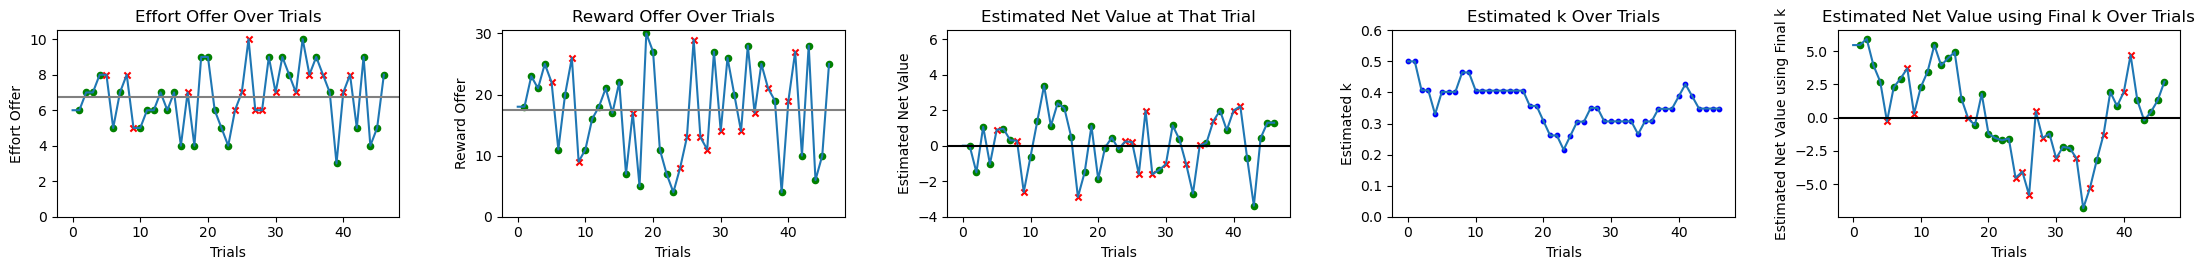

Participant 6, Final Estimated k: 0.28


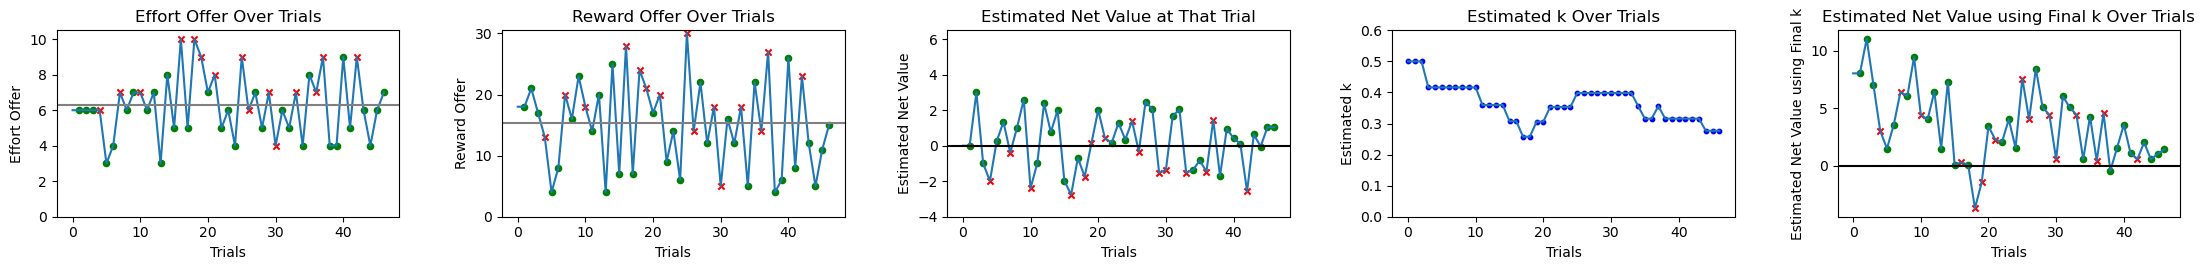

Participant 4, Final Estimated k: 0.31


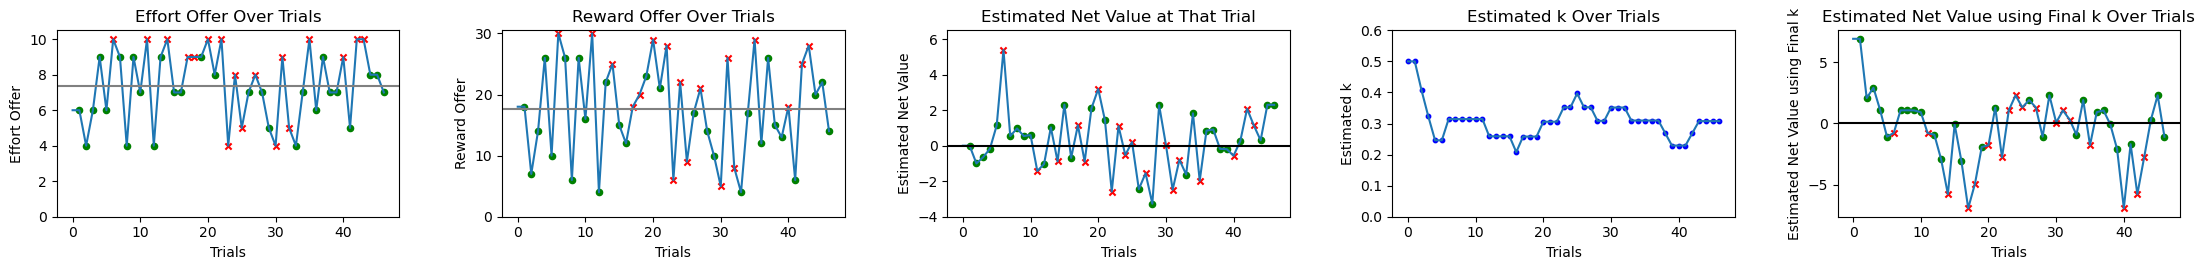

Participant 5, Final Estimated k: 0.31


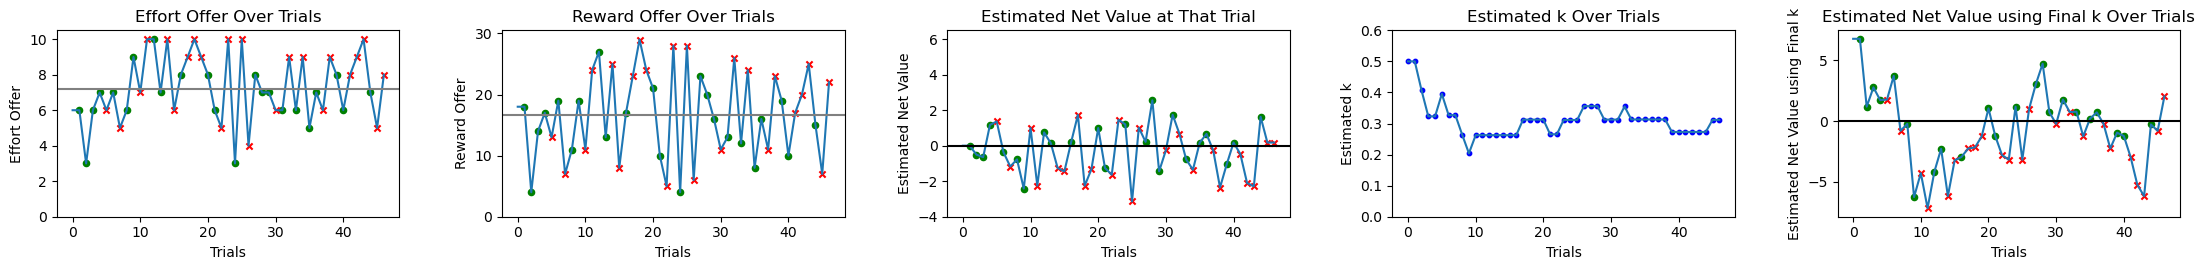

Participant 3, Final Estimated k: 0.28


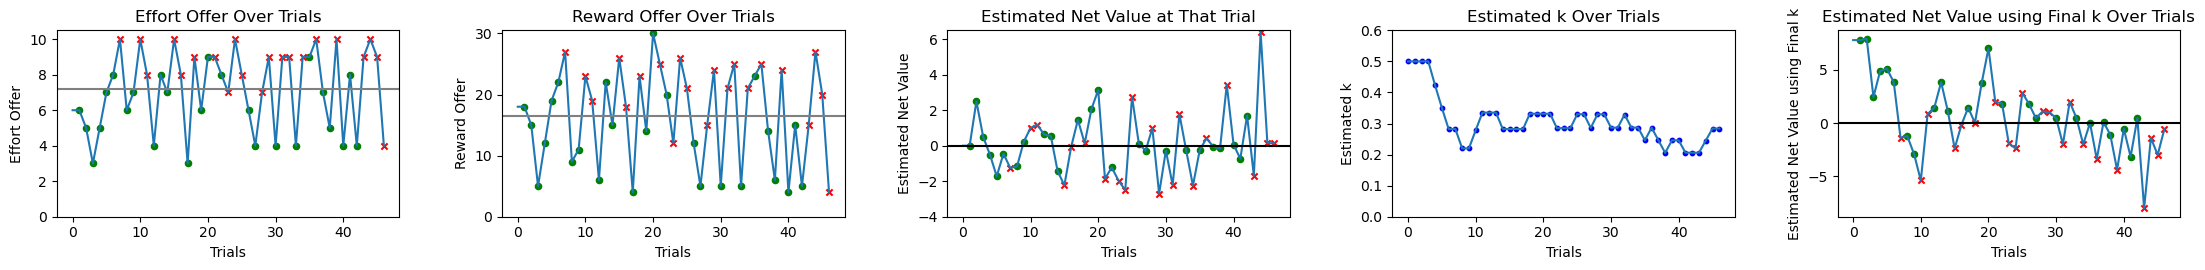

In [31]:
for participant in combined_df['participant'].unique():

    participant_data = combined_df[combined_df['participant'] == participant]
    
    # Extracting data for plotting
    estimated_net_values = participant_data['estimated_net_value'].values
    responses = participant_data['participant_response'].values
    estimated_ks = participant_data['estimated_k'].values
    effort_offers = participant_data['effort_offer'].values
    reward_offers = participant_data['reward_offer'].values
    final_estimated_k = participant_data['estimated_k'].values[-1]
    net_value_using_final_k = participant_data['estimated_net_value_final_k'].values


    print(f'Participant {participant}, Final Estimated k: {final_estimated_k:.2f}')


    plt.figure(figsize=(22, 2.8))  

    # Plot for effort offers and responses over trials
    plt.subplot(1, 5, 1)
    plt.plot(effort_offers, label='Effort Offer')
    plt.scatter(np.arange(len(responses)), [effort_offers[i] if res == 'accepted' else None for i, res in enumerate(responses)], color='green', marker='o', label='Accept', s=20)
    plt.scatter(np.arange(len(responses)), [effort_offers[i] if res == 'rejected' else None for i, res in enumerate(responses)], color='red', marker='x', label='Reject', s=20)
    plt.axhline(y=np.mean(effort_offers), color='grey', linestyle='-')
    plt.ylim([0, 10.5])
    plt.xlabel('Trials')
    plt.ylabel('Effort Offer')
    plt.title(f'Effort Offer Over Trials')

    # Plot for reward offers and responses over trials
    plt.subplot(1, 5, 2)
    plt.plot(reward_offers, label='Reward Offer')
    plt.scatter(np.arange(len(responses)), [reward_offers[i] if res == 'accepted' else None for i, res in enumerate(responses)], color='green', marker='o', label='Accept', s=20)
    plt.scatter(np.arange(len(responses)), [reward_offers[i] if res == 'rejected' else None for i, res in enumerate(responses)], color='red', marker='x', label='Reject', s=20)
    plt.axhline(y=np.mean(reward_offers), color='grey', linestyle='-')
    plt.ylim([0, 30.5])
    plt.xlabel('Trials')
    plt.ylabel('Reward Offer')
    plt.title(f'Reward Offer Over Trials')

    # # Plot for "Reward minus Effort" over trials
    # plt.subplot(1, 5, 3)
    # plt.plot(reward_minus_effort, label='Reward minus Effort')
    # plt.scatter(np.arange(len(responses)), [reward_minus_effort[i] if res == 'accepted' else None for i, res in enumerate(responses)], color='green', marker='o', label='Accept', s=20)
    # plt.scatter(np.arange(len(responses)), [reward_minus_effort[i] if res == 'rejected' else None for i, res in enumerate(responses)], color='red', marker='x', label='Reject', s=20)
    # plt.axhline(y=np.mean(reward_minus_effort), color='grey', linestyle='-')
    # plt.ylim([-0.5, 22])
    # plt.xlabel('Trials')
    # plt.ylabel('Reward minus Effort')
    # plt.title(f'Reward minus Effort Over Trials')

    # Plot for estimated net values and responses over trials
    plt.subplot(1, 5, 3)
    plt.plot(estimated_net_values, label='Estimated Net Values at That Trial')
    plt.scatter(np.arange(len(responses)), [estimated_net_values[i] if res == 'accepted' else None for i, res in enumerate(responses)], color='green', marker='o', label='Accept', s=20)
    plt.scatter(np.arange(len(responses)), [estimated_net_values[i] if res == 'rejected' else None for i, res in enumerate(responses)], color='red', marker='x', label='Reject', s=20)
    plt.axhline(y=0, color='black', linestyle='-')
    plt.ylim([-4, 6.5])
    plt.xlabel('Trials')
    plt.ylabel('Estimated Net Value')
    plt.title(f'Estimated Net Value at That Trial')

    # Plot for estimated k over trials with blue points for all responses
    plt.subplot(1, 5, 4)
    plt.plot(estimated_ks, label='Estimated k')
    plt.scatter(np.arange(len(responses)), estimated_ks, color='blue', marker='o', s=10)  
    plt.ylim([0, 0.6])
    plt.xlabel('Trials')
    plt.ylabel('Estimated k')
    plt.title(f'Estimated k Over Trials')

    # Plot for estimated net values with final k and responses over trials
    plt.subplot(1, 5, 5)
    plt.plot(net_value_using_final_k, label='Estimated Net Values Using Final k')
    plt.scatter(np.arange(len(responses)), [net_value_using_final_k[i] if res == 'accepted' else None for i, res in enumerate(responses)], color='green', marker='o', label='Accept', s=20)
    plt.scatter(np.arange(len(responses)), [net_value_using_final_k[i] if res == 'rejected' else None for i, res in enumerate(responses)], color='red', marker='x', label='Reject', s=20)
    plt.axhline(y=0, color='black', linestyle='-')
    #plt.ylim([-4, 6.5])
    plt.xlabel('Trials')
    plt.ylabel('Estimated Net Value using Final k')
    plt.title(f'Estimated Net Value using Final k Over Trials')


    plt.tight_layout()
    plt.subplots_adjust(wspace=0.3) 
    plt.show()



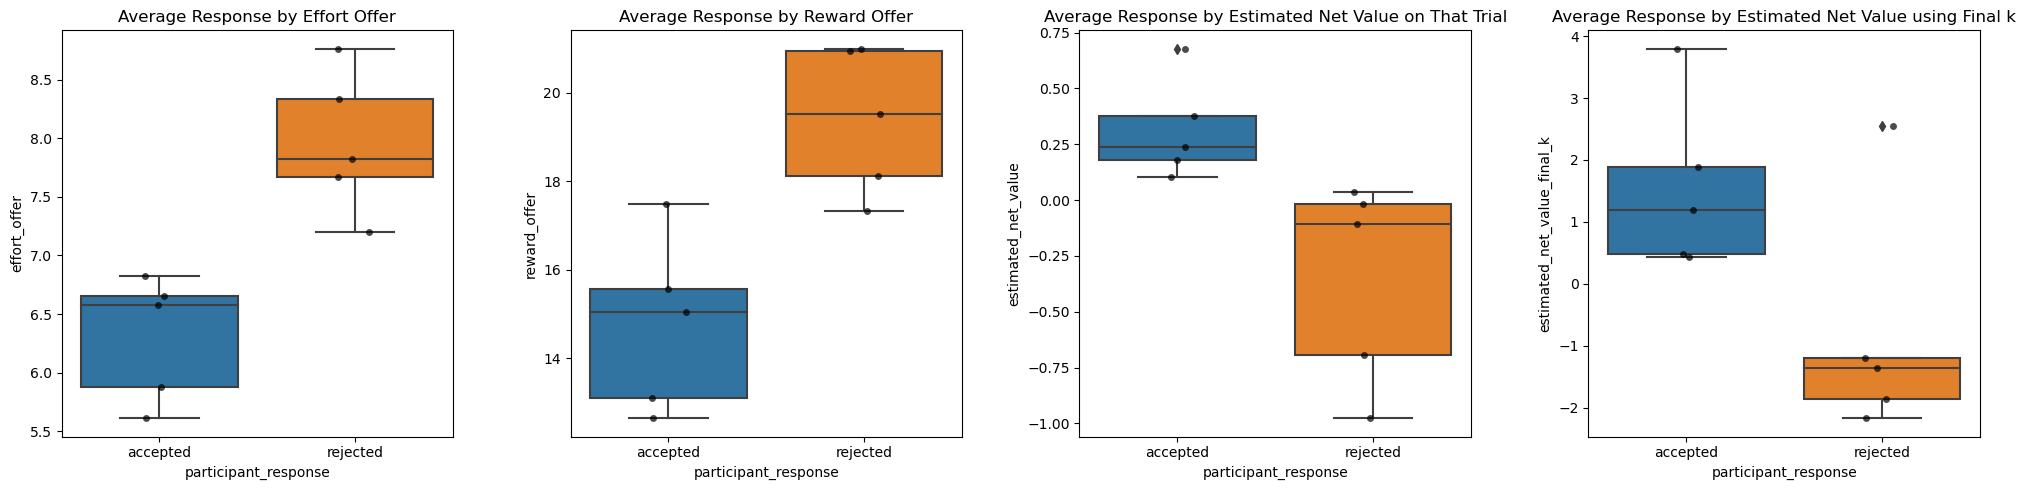

In [32]:
# List of columns to calculate the mean for
numeric_columns = ['effort_offer', 'reward_offer', 'estimated_net_value', 'estimated_net_value_final_k']

# Calculate the mean of each specified numeric variable for accept/reject for each participant
# Ensure we only include the numeric columns in the groupby aggregation
grouped_means = combined_df.groupby(['participant', 'participant_response'])[numeric_columns].mean().reset_index()

# Set up a matplotlib figure with 4 subplots, arranged horizontally
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

stripplot_params = {
    'color': 'black',
    'alpha': 0.7, 
    'size': 5,  
    'jitter': True 
}

# Plot for Effort Offer with individual data points
sns.boxplot(x="participant_response", y="effort_offer", data=grouped_means, ax=axes[0])
sns.stripplot(x="participant_response", y="effort_offer", data=grouped_means, ax=axes[0], **stripplot_params)
axes[0].set_title('Average Response by Effort Offer')

# Plot for Reward Offer with individual data points
sns.boxplot(x="participant_response", y="reward_offer", data=grouped_means, ax=axes[1])
sns.stripplot(x="participant_response", y="reward_offer", data=grouped_means, ax=axes[1], **stripplot_params)
axes[1].set_title('Average Response by Reward Offer')

# Plot for Estimated Net Value with individual data points
sns.boxplot(x="participant_response", y="estimated_net_value", data=grouped_means, ax=axes[2])
sns.stripplot(x="participant_response", y="estimated_net_value", data=grouped_means, ax=axes[2], **stripplot_params)
axes[2].set_title('Average Response by Estimated Net Value on That Trial')

# Plot for Estimated Net Value using Final k with individual data points
sns.boxplot(x="participant_response", y="estimated_net_value_final_k", data=grouped_means, ax=axes[3])
sns.stripplot(x="participant_response", y="estimated_net_value_final_k", data=grouped_means, ax=axes[3], **stripplot_params)
axes[3].set_title('Average Response by Estimated Net Value using Final k')

plt.tight_layout()
plt.subplots_adjust(wspace=0.3) # Adjust space between plots
plt.show()


/var/folders/d0/p878jscj4m1f6w4d3xn26m1w0000gn/T/ipykernel_41854/3702628900.py:32: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(row['effort_offer'], net_value_for_response, color=color, marker=shape, s=100, edgecolor='black')


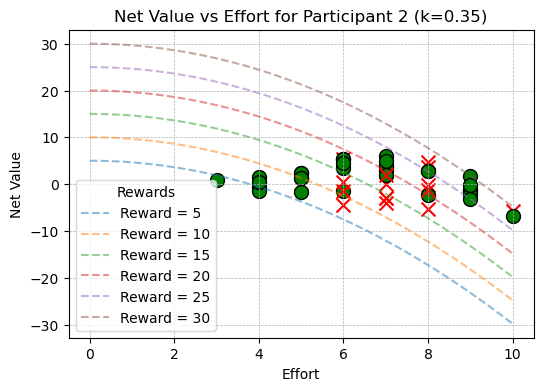

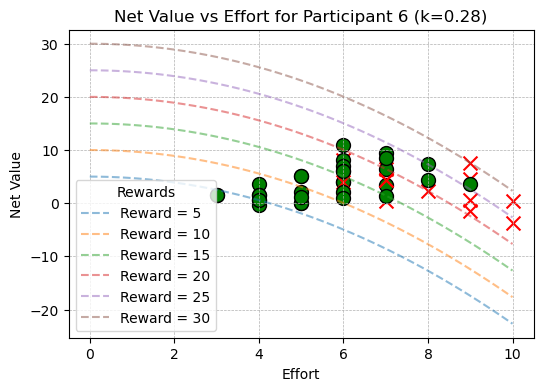

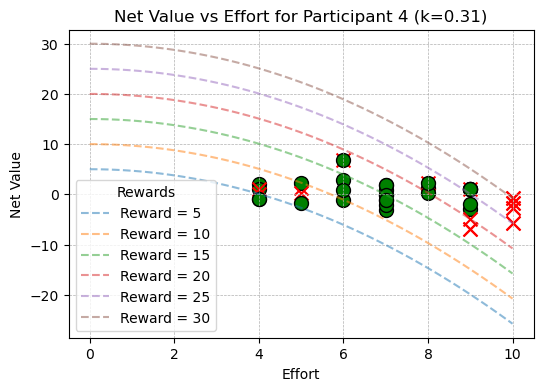

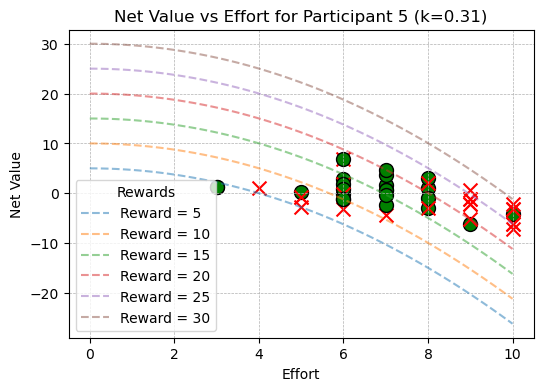

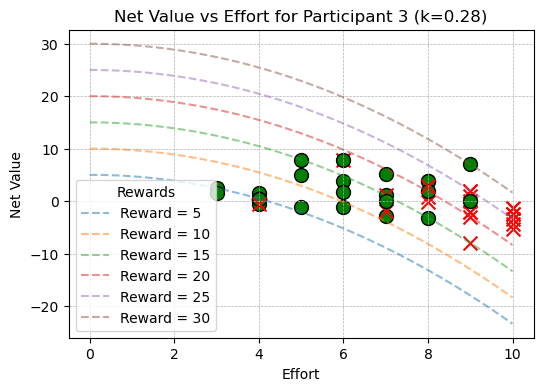

In [42]:
#plot responses on parabolic discounting function for each person

# Effort levels for the plots
effort_levels = np.linspace(0, 10, 100)

# Define a set of different rewards to plot
reward_values = [5, 10, 15, 20, 25, 30]

# Unique participants from the dataframe
participants = combined_df['participant'].unique()

for participant in participants:
    plt.figure(figsize=(6, 4))
    
    # Filter data for the current participant
    participant_data = combined_df[combined_df['participant'] == participant]
    
    # Get the final k value for the current participant
    final_k = participant_data['final_estimated_k'].values[0]

    # Plot a line for each reward
    for reward in reward_values:
        net_values = reward - final_k * effort_levels ** 2
        plt.plot(effort_levels, net_values, linestyle='--', label=f'Reward = {reward}', alpha=0.5)

    # Add participant responses as dots
    for index, row in participant_data.iterrows():
        color = 'green' if row['participant_response'] == 'accepted' else 'red'
        shape = 'o' if row['participant_response'] == 'accepted' else 'x'
        net_value_for_response = row['reward_offer'] - final_k * row['effort_offer'] ** 2
        plt.scatter(row['effort_offer'], net_value_for_response, color=color, marker=shape, s=100, edgecolor='black')

    plt.title(f'Net Value vs Effort for Participant {participant} (k={final_k:.2f})')
    plt.xlabel('Effort')
    plt.ylabel('Net Value')
    plt.legend(title='Rewards', loc='lower left')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.show()


/var/folders/d0/p878jscj4m1f6w4d3xn26m1w0000gn/T/ipykernel_41854/569376391.py:17: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(row['effort_offer'], net_value_for_response, color=color, marker=shape, s=100, edgecolor='black')


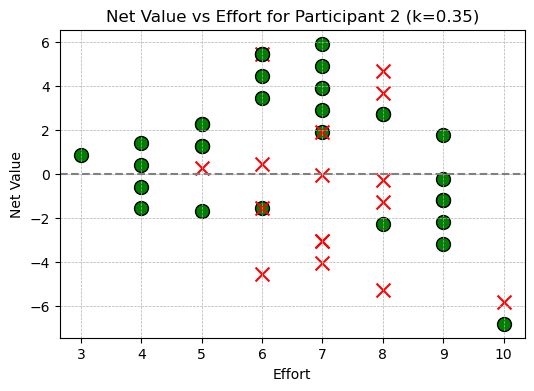

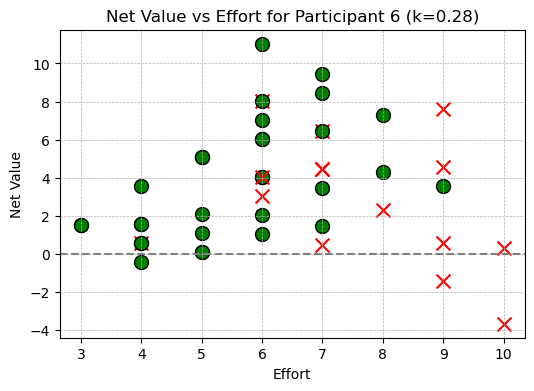

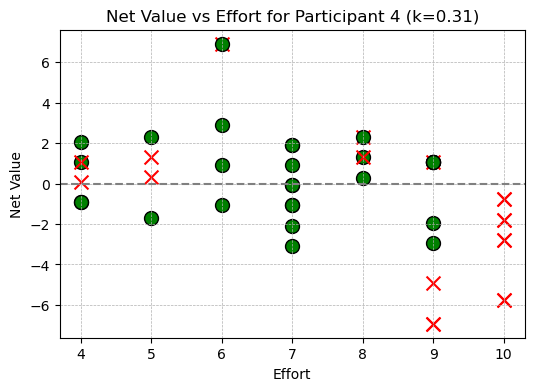

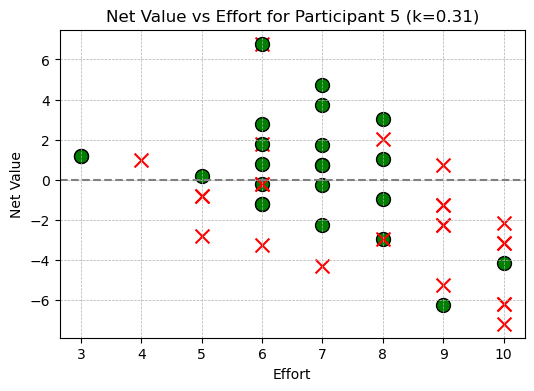

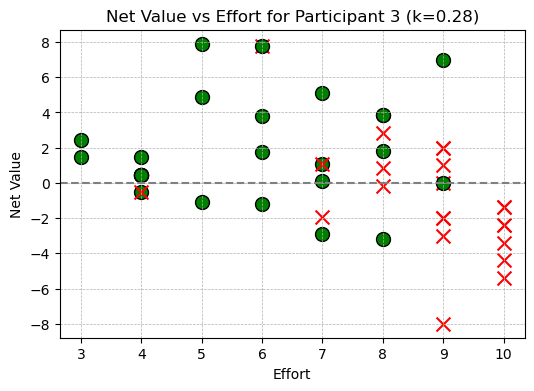

In [45]:
import matplotlib.pyplot as plt
import numpy as np

# Unique participants from the dataframe
participants = combined_df['participant'].unique()

for participant in participants:
    plt.figure(figsize=(6, 4))
    participant_data = combined_df[combined_df['participant'] == participant]
    final_k = participant_data['final_estimated_k'].values[0]

    # Plotting actual participant responses
    for index, row in participant_data.iterrows():
        color = 'green' if row['participant_response'] == 'accepted' else 'red'
        shape = 'o' if row['participant_response'] == 'accepted' else 'x'
        net_value_for_response = row['reward_offer'] - final_k * row['effort_offer'] ** 2
        plt.scatter(row['effort_offer'], net_value_for_response, color=color, marker=shape, s=100, edgecolor='black')
    
    # Highlight the zero net-value line
    plt.axhline(0, color='grey', linestyle='--', linewidth=1.5)

    plt.title(f'Net Value vs Effort for Participant {participant} (k={final_k:.2f})')
    plt.xlabel('Effort')
    plt.ylabel('Net Value')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.show()
